In [1]:
# Import Pandas and NumPy
import numpy as np 
import pandas as pd

# Import Libraries for plotting
import matplotlib.pyplot as plt, seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)

In [2]:
#Importing Dataset
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
print('Shape of general_data :',wine_df.shape)
wine_df.head()

Shape of general_data : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Checking Missing Values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### EDA

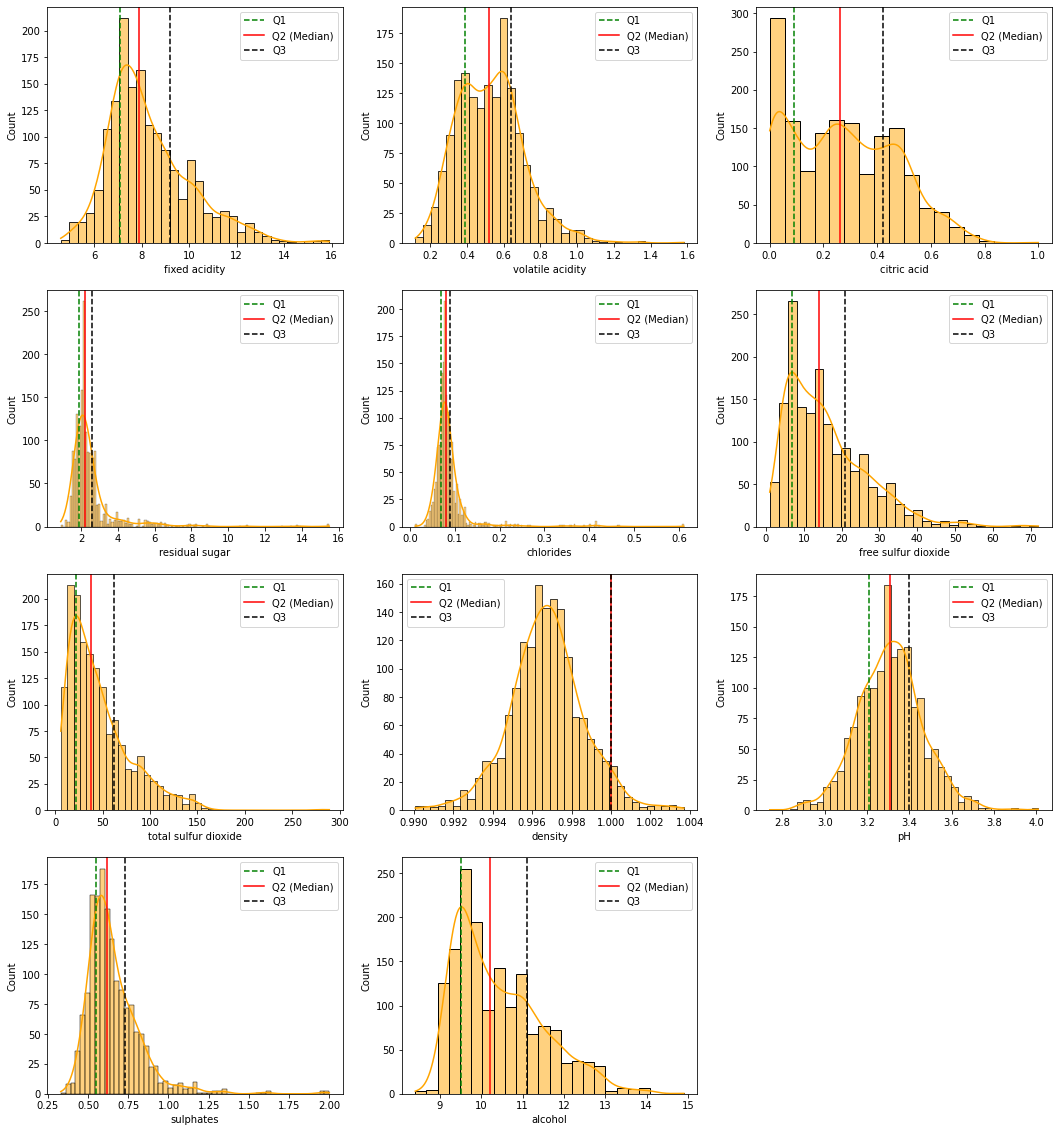

In [7]:
feature_ = wine_df.columns[:-1]

def get_percentile(feature, q_range):
    #This function is used to calculate the percentile for the passed input feature 
    dist = wine_df[feature].describe()[str(q_range) + '%']
    return round(dist,2)

def render_counterplot():
    fig=plt.figure(figsize=(18, 20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4, 3, column + 1)
        
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
          
        sns.histplot(data=wine_df, x=feature, kde=True, color = 'orange')
        
        plt.axvline(q1, linestyle='--', color='green', label='Q1')
        plt.axvline(q2, color='red', label='Q2 (Median)')
        plt.axvline(q3, linestyle='--',  color='black', label='Q3')
        plt.legend()
        
    plt.show()
    
render_counterplot()

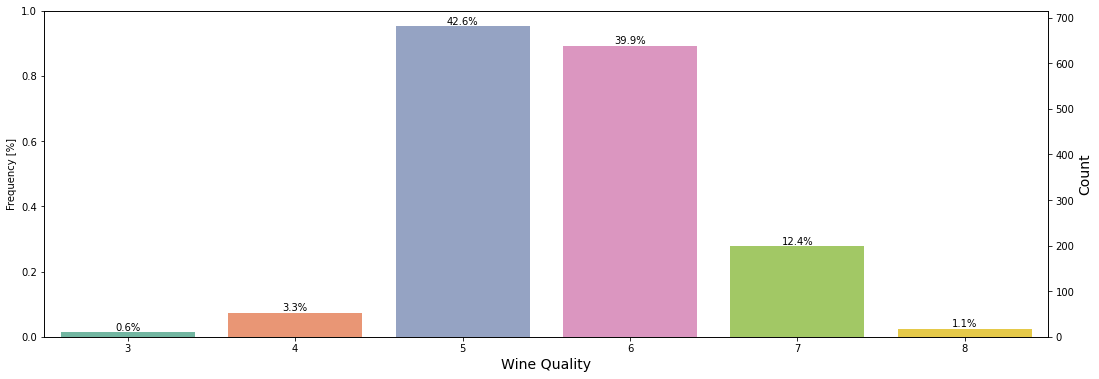

In [8]:
# Initialize a figure for plotting the Distribution of target class 'quality'
plt.figure(figsize = (18,6))
    
# Generate a countplot for the passed feature_name
ax1 = sns.countplot(x='quality', data=wine_df, palette='Set2')        
# set title, xlabel, ylabel, legend
plt.xlabel('Wine Quality',fontsize  = 14)
plt.ylabel('Count',fontsize  = 14)

# Make twin axis
ax2=ax1.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()

# Also switch the labels over
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(wine_df)), (x.mean(), y), ha='center', va='bottom')

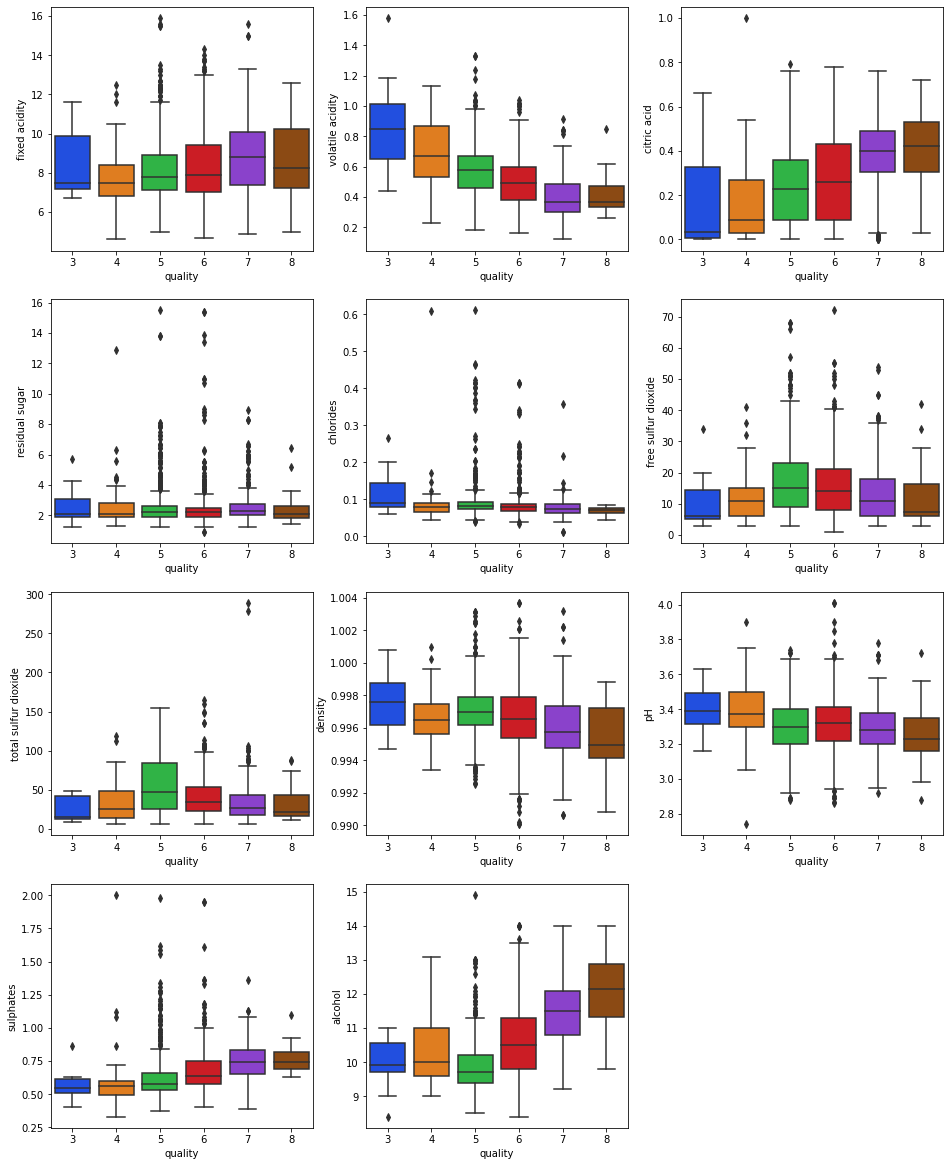

In [9]:
features_ = wine_df.columns.values[:-1]

fig=plt.figure(figsize=(16, 26))
for column, feature in enumerate(features_):
    if feature != "quality":
        fig.add_subplot(5, 3, column + 1)
        sns.boxplot(data=wine_df, x="quality", y=feature, color="#8585f2", palette="bright")
    
plt.show()

### Key take-aways from EDA :  

- Based on the univariate analysis of feature, it was observed that a few Features are highly skewed which implies that extreme outliers are present.
- Based on the Bi-variate analysis, it was observed that a Few features were positively or negatively correlated with the target variable. 
- The target variable 'quality' is highly imbalanced which can affect machine learning model's performance.

### Feature Engineering

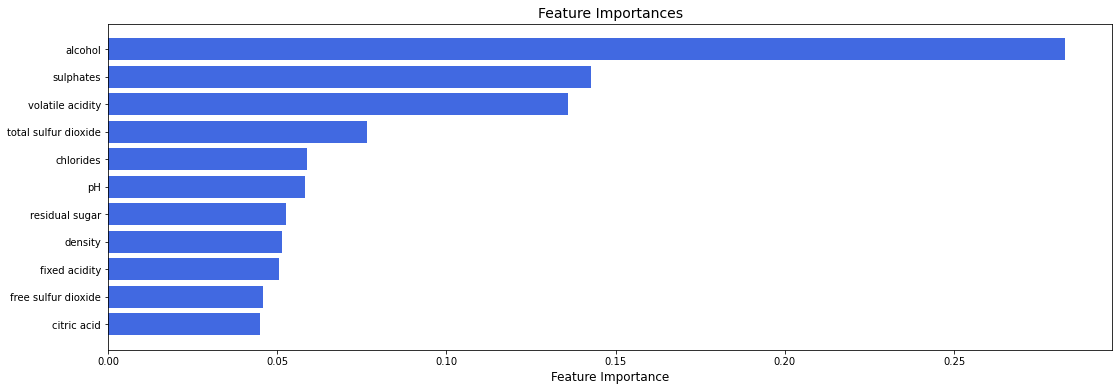

In [10]:
# Let's use Random Forest Model to calculate Importance of Each Feature

# Import and initialize randomforest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

# prepare training data for this model
x = wine_df.drop(['quality'] , axis = 1)

# Train Model
rf.fit(x, wine_df.quality)

# store importance and feature names
features = wine_df.columns    # store feature names
importances = rf.feature_importances_    # get feature importance score from randomforest model using .feature_importance_ attribute
sorted_index = np.argsort(importances)[:]    # sort importance in descending order

# Plot Feature Importance
plt.figure(figsize=(18,6))
plt.title('Feature Importances', fontsize= 14)
plt.barh(range(len(sorted_index)), importances[sorted_index], color='royalblue', align='center')
plt.yticks(range(len(sorted_index)), [features[i] for i in sorted_index]) # set x-axis ticks as feature names
plt.xlabel('Feature Importance', fontsize= 12)
plt.show()


In [11]:
wine_df.drop(['free sulfur dioxide','citric acid'],axis=1,inplace=True)

### Split Features and Target

In [12]:
# Input Features
X = wine_df.drop('quality', axis = 1)

# Target Variable
y = wine_df['quality']

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

#### Standardize input columns using [Standard Scaler]

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# standardize all columns of training and testing data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

#### Check for multi-collinearity

In [15]:
# Save the training data in a separate df which will be used for finding coorelation
df_corr = X_train.copy()

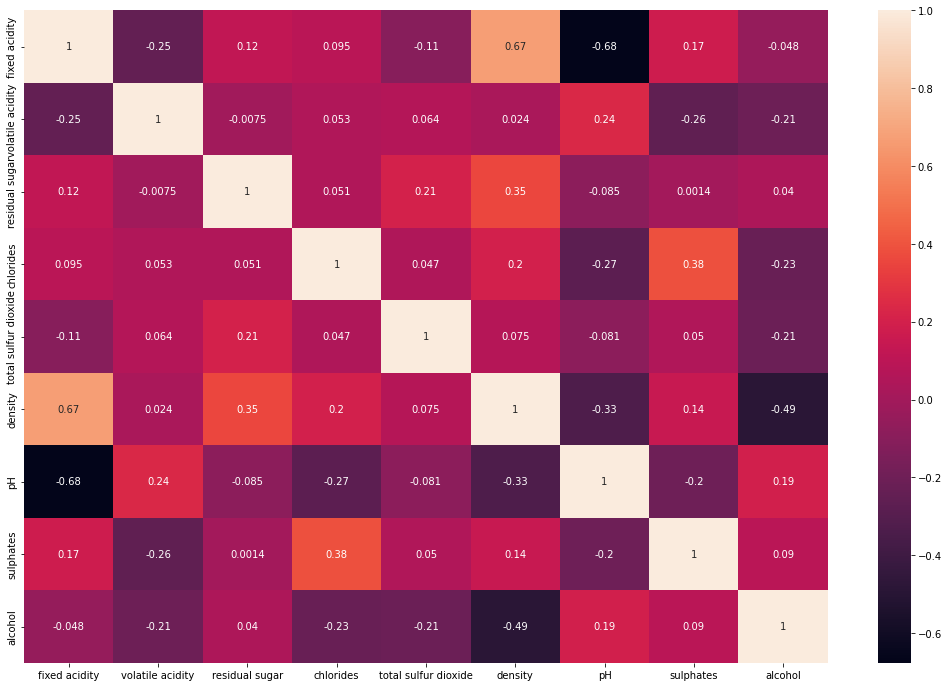

In [16]:
# plot a heatmap of correlation in training data
plt.figure(figsize = (18,12))

# seaborn heatmap
sns.heatmap(df_corr.corr(),cbar=True, annot=True) # annot=True shows value in each file of heatmap, cbar shows the colour scale
plt.show()

In [17]:
X_train.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
1070,0.568736,-1.103037,-0.736729,-0.636853,-0.302258,-0.940708,-0.845406,1.314752,0.627630
563,-0.420879,-1.327359,0.100482,0.080037,0.391344,0.185132,0.005595,-0.298047,-0.308238
523,0.568736,-0.710475,-0.039053,-0.063341,2.864186,0.556871,-0.583560,-0.643646,-0.963346
1227,0.394099,0.298972,-0.387891,0.325828,-0.784763,0.498455,-0.256251,0.335553,-0.776172
1399,-0.653729,0.803695,-0.248356,-0.411544,-0.694293,-0.611453,0.725674,0.335553,0.627630


## Lets Over-Sample the training Data 
As, there are 6 categories in the target variable and out of it 2 variables have more than 80% of records.  

Imbalanced dataset pose a challenge for predictive modeling as most of the machine learning algorithms used for classification are designed around the assumption of an equal number of examples for each class. So, training a model on imbalanced dataset results in poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

For this purpose We will over-sample the minority class (1's) in the target variable and make the number of 0's(majority class) and 1's(minority class) equal.

### Perform training data over-sampling

In [18]:
# Import Synthetic minority over-sampling from imblearn libraray
from imblearn.over_sampling import SMOTE

In [19]:
smte = SMOTE(random_state=42)
X_train_os, y_train_os = smte.fit_resample(X_train,y_train)  # Fit SMOTE with training data and re-sample the data to get balanced data.

print('Training data classes :5\'s   6\'s   7\'s   4\'s  8\'s 3\'s')
print('Before over-sampling   {}   {}   {}   {}   {}   {}'.format(list(y_train.value_counts().values)[0],list(y_train.value_counts().values)[1],list(y_train.value_counts().values)[2],list(y_train.value_counts().values)[3],list(y_train.value_counts().values)[4],list(y_train.value_counts().values)[5]))
print('After over-sampling    {}   {}   {}   {}  {}  {}\n'.format(list(y_train_os.value_counts().values)[0],list(y_train_os.value_counts().values)[1],list(y_train_os.value_counts().values)[2],list(y_train_os.value_counts().values)[3],list(y_train_os.value_counts().values)[4],list(y_train_os.value_counts().values)[5]))

print('After Over-sampling {} synthetic records were added to the training data and now there are equal proportion of records from each class'.format(len(X_train_os)-len(X_train)))

Training data classes :5's   6's   7's   4's  8's 3's
Before over-sampling   613   574   179   48   16   9
After over-sampling    613   613   613   613  613  613

After Over-sampling 2239 synthetic records were added to the training data and now there are equal proportion of records from each class


In [20]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_os = le.fit_transform(y_train_os)
y_test = le.transform(y_test)

In [21]:
y_train_os = pd.DataFrame(y_train_os.reshape(len(y_train_os),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [22]:
import tensorflow as tf                     # use to_categorical function present in tensorflow library
y_train_os = tf.keras.utils.to_categorical(y_train_os, 6)
y_test = tf.keras.utils.to_categorical(y_test, 6)

### Model Building

In [23]:
# Import Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.layers import Dropout

<b> Creating dataset for an AND Gate</b>

In [24]:
# Inputs (These inputs resemble an AND gate)
x1 = np.array([[0,0], [0,1], [1,0], [1,1]], "uint8")

# Target
y1  = np.array([[0], [0], [0], [1]], "uint8")

#### Using Tensorflow Create a Sequential Model 

In [25]:
# Define sequential model
model = Sequential()

# Add output layer, here we just need to add 1 output layer, with 2 dimensional input and sigmoid activation function
model.add(Dense(units=1, activation='sigmoid',input_dim=2))

# Compile model and define the loss function, optimizers, and metrics for prediction
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x1, y1, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 0.7688 - accuracy: 0.7500
Epoch 2/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7683 - accuracy: 0.7500
Epoch 3/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.7678 - accuracy: 0.7500
Epoch 4/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.7673 - accuracy: 0.7500
Epoch 5/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.7668 - accuracy: 0.7500
Epoch 6/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.7663 - accuracy: 0.7500
Epoch 7/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.7658 - accuracy: 0.7500
Epoch 8/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.7653 - accuracy: 0.7500
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7648 - accuracy: 0.7500
Epoch 10/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7644 - accuracy: 0.7500
Epoch 11/5000

1/1 [==============================] - 0s 9ms/step - loss: 0.7321 - accuracy: 0.7500
Epoch 84/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7317 - accuracy: 0.7500
Epoch 85/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7313 - accuracy: 0.7500
Epoch 86/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7309 - accuracy: 0.7500
Epoch 87/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.7305 - accuracy: 0.7500
Epoch 88/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7301 - accuracy: 0.7500
Epoch 89/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.7500
Epoch 90/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7293 - accuracy: 0.7500
Epoch 91/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7289 - accuracy: 0.7500
Epoch 92/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7285 - accuracy: 0.7500
Epoch 93/5000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 0.7019 - accuracy: 0.7500
Epoch 166/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7016 - accuracy: 0.7500
Epoch 167/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7012 - accuracy: 0.7500
Epoch 168/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7009 - accuracy: 0.7500
Epoch 169/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7005 - accuracy: 0.7500
Epoch 170/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7002 - accuracy: 0.7500
Epoch 171/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6998 - accuracy: 0.7500
Epoch 172/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6995 - accuracy: 0.7500
Epoch 173/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6992 - accuracy: 0.7500
Epoch 174/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6988 - accuracy: 0.7500
Epoch 175/5000

1/1 [==============================] - 0s 8ms/step - loss: 0.6751 - accuracy: 0.7500
Epoch 247/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.7500
Epoch 248/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6745 - accuracy: 0.7500
Epoch 249/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6742 - accuracy: 0.7500
Epoch 250/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6739 - accuracy: 0.7500
Epoch 251/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.7500
Epoch 252/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6732 - accuracy: 0.7500
Epoch 253/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6729 - accuracy: 0.7500
Epoch 254/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6726 - accuracy: 0.7500
Epoch 255/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.7500
Epoch 256/50

1/1 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.7500
Epoch 328/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6501 - accuracy: 0.7500
Epoch 329/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6498 - accuracy: 0.7500
Epoch 330/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6495 - accuracy: 0.7500
Epoch 331/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6492 - accuracy: 0.7500
Epoch 332/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6489 - accuracy: 0.7500
Epoch 333/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6486 - accuracy: 0.7500
Epoch 334/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6483 - accuracy: 0.7500
Epoch 335/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6480 - accuracy: 0.7500
Epoch 336/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6477 - accuracy: 0.7500
Epoch 337/500

1/1 [==============================] - 0s 8ms/step - loss: 0.6276 - accuracy: 0.7500
Epoch 409/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6273 - accuracy: 0.7500
Epoch 410/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.7500
Epoch 411/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6268 - accuracy: 0.7500
Epoch 412/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6265 - accuracy: 0.7500
Epoch 413/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.7500
Epoch 414/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.7500
Epoch 415/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6257 - accuracy: 0.7500
Epoch 416/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6255 - accuracy: 0.7500
Epoch 417/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6252 - accuracy: 0.7500
Epoch 418/500

1/1 [==============================] - 0s 5ms/step - loss: 0.6068 - accuracy: 0.7500
Epoch 490/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6065 - accuracy: 0.7500
Epoch 491/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.7500
Epoch 492/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6060 - accuracy: 0.7500
Epoch 493/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.7500
Epoch 494/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6055 - accuracy: 0.7500
Epoch 495/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.7500
Epoch 496/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6050 - accuracy: 0.7500
Epoch 497/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6048 - accuracy: 0.7500
Epoch 498/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6046 - accuracy: 0.7500
Epoch 499/5000

1/1 [==============================] - 0s 9ms/step - loss: 0.5877 - accuracy: 0.7500
Epoch 571/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5875 - accuracy: 0.7500
Epoch 572/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.7500
Epoch 573/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5870 - accuracy: 0.7500
Epoch 574/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5868 - accuracy: 0.7500
Epoch 575/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.7500
Epoch 576/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5864 - accuracy: 0.7500
Epoch 577/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5861 - accuracy: 0.7500
Epoch 578/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5859 - accuracy: 0.7500
Epoch 579/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5857 - accuracy: 0.7500
Epoch 580/500

1/1 [==============================] - 0s 8ms/step - loss: 0.5703 - accuracy: 0.7500
Epoch 652/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5701 - accuracy: 0.7500
Epoch 653/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5699 - accuracy: 0.7500
Epoch 654/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.7500
Epoch 655/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5695 - accuracy: 0.7500
Epoch 656/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 657/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5691 - accuracy: 0.7500
Epoch 658/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5689 - accuracy: 0.7500
Epoch 659/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5687 - accuracy: 0.7500
Epoch 660/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5685 - accuracy: 0.7500
Epoch 661/5000

1/1 [==============================] - 0s 9ms/step - loss: 0.5544 - accuracy: 0.7500
Epoch 733/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5542 - accuracy: 0.7500
Epoch 734/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5540 - accuracy: 0.7500
Epoch 735/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5538 - accuracy: 0.7500
Epoch 736/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5536 - accuracy: 0.7500
Epoch 737/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5534 - accuracy: 0.7500
Epoch 738/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5533 - accuracy: 0.7500
Epoch 739/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5531 - accuracy: 0.7500
Epoch 740/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5529 - accuracy: 0.7500
Epoch 741/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5527 - accuracy: 0.7500
Epoch 742/500

1/1 [==============================] - 0s 8ms/step - loss: 0.5397 - accuracy: 0.7500
Epoch 814/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5396 - accuracy: 0.7500
Epoch 815/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5394 - accuracy: 0.7500
Epoch 816/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5392 - accuracy: 0.7500
Epoch 817/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5390 - accuracy: 0.7500
Epoch 818/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5389 - accuracy: 0.7500
Epoch 819/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5387 - accuracy: 0.7500
Epoch 820/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5385 - accuracy: 0.7500
Epoch 821/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5384 - accuracy: 0.7500
Epoch 822/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5382 - accuracy: 0.7500
Epoch 823/50

1/1 [==============================] - 0s 7ms/step - loss: 0.5262 - accuracy: 1.0000
Epoch 895/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5260 - accuracy: 1.0000
Epoch 896/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5259 - accuracy: 1.0000
Epoch 897/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5257 - accuracy: 1.0000
Epoch 898/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5256 - accuracy: 1.0000
Epoch 899/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5254 - accuracy: 1.0000
Epoch 900/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5252 - accuracy: 1.0000
Epoch 901/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5251 - accuracy: 1.0000
Epoch 902/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 1.0000
Epoch 903/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5248 - accuracy: 1.0000
Epoch 904/

1/1 [==============================] - 0s 6ms/step - loss: 0.5136 - accuracy: 1.0000
Epoch 976/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5134 - accuracy: 1.0000
Epoch 977/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5133 - accuracy: 1.0000
Epoch 978/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5131 - accuracy: 1.0000
Epoch 979/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5130 - accuracy: 1.0000
Epoch 980/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5128 - accuracy: 1.0000
Epoch 981/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5127 - accuracy: 1.0000
Epoch 982/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5125 - accuracy: 1.0000
Epoch 983/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5124 - accuracy: 1.0000
Epoch 984/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5122 - accuracy: 1.0000
Epoch 985/

1/1 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 1.0000
Epoch 1057/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5016 - accuracy: 1.0000
Epoch 1058/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5015 - accuracy: 1.0000
Epoch 1059/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 1.0000
Epoch 1060/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5012 - accuracy: 1.0000
Epoch 1061/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5011 - accuracy: 1.0000
Epoch 1062/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5009 - accuracy: 1.0000
Epoch 1063/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 1.0000
Epoch 1064/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5006 - accuracy: 1.0000
Epoch 1065/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 6ms/step - loss: 0.4906 - accuracy: 1.0000
Epoch 1138/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 1.0000
Epoch 1139/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4903 - accuracy: 1.0000
Epoch 1140/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4902 - accuracy: 1.0000
Epoch 1141/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4901 - accuracy: 1.0000
Epoch 1142/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4899 - accuracy: 1.0000
Epoch 1143/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4898 - accuracy: 1.0000
Epoch 1144/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 1.0000
Epoch 1145/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4895 - accuracy: 1.0000
Epoch 1146/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4894 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 9ms/step - loss: 0.4800 - accuracy: 1.0000
Epoch 1219/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 1.0000
Epoch 1220/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4797 - accuracy: 1.0000
Epoch 1221/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4796 - accuracy: 1.0000
Epoch 1222/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 1.0000
Epoch 1223/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 1.0000
Epoch 1224/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4792 - accuracy: 1.0000
Epoch 1225/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4791 - accuracy: 1.0000
Epoch 1226/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 1.0000
Epoch 1227/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.4698 - accuracy: 1.0000
Epoch 1300/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4697 - accuracy: 1.0000
Epoch 1301/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4696 - accuracy: 1.0000
Epoch 1302/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4694 - accuracy: 1.0000
Epoch 1303/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4693 - accuracy: 1.0000
Epoch 1304/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4692 - accuracy: 1.0000
Epoch 1305/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4691 - accuracy: 1.0000
Epoch 1306/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.4690 - accuracy: 1.0000
Epoch 1307/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 1.0000
Epoch 1308/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 1.0000
Epoch 1381/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 1.0000
Epoch 1382/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 1.0000
Epoch 1383/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 1.0000
Epoch 1384/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4596 - accuracy: 1.0000
Epoch 1385/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4594 - accuracy: 1.0000
Epoch 1386/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4593 - accuracy: 1.0000
Epoch 1387/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4592 - accuracy: 1.0000
Epoch 1388/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4591 - accuracy: 1.0000
Epoch 1389/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4590 - accuracy: 1.0000
Epoch 13

1/1 [==============================] - 0s 7ms/step - loss: 0.4506 - accuracy: 1.0000
Epoch 1462/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 1.0000
Epoch 1463/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 1.0000
Epoch 1464/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4502 - accuracy: 1.0000
Epoch 1465/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 1.0000
Epoch 1466/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4500 - accuracy: 1.0000
Epoch 1467/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4499 - accuracy: 1.0000
Epoch 1468/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4498 - accuracy: 1.0000
Epoch 1469/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 1.0000
Epoch 1470/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4495 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 1.0000
Epoch 1543/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 1.0000
Epoch 1544/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 1.0000
Epoch 1545/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4410 - accuracy: 1.0000
Epoch 1546/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 1.0000
Epoch 1547/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 1.0000
Epoch 1548/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4407 - accuracy: 1.0000
Epoch 1549/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4406 - accuracy: 1.0000
Epoch 1550/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4405 - accuracy: 1.0000
Epoch 1551/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4404 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.4325 - accuracy: 1.0000
Epoch 1624/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4323 - accuracy: 1.0000
Epoch 1625/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4322 - accuracy: 1.0000
Epoch 1626/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4321 - accuracy: 1.0000
Epoch 1627/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4320 - accuracy: 1.0000
Epoch 1628/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4319 - accuracy: 1.0000
Epoch 1629/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4318 - accuracy: 1.0000
Epoch 1630/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4317 - accuracy: 1.0000
Epoch 1631/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4316 - accuracy: 1.0000
Epoch 1632/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4315 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 10ms/step - loss: 0.4238 - accuracy: 1.0000
Epoch 1705/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4237 - accuracy: 1.0000
Epoch 1706/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4235 - accuracy: 1.0000
Epoch 1707/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4234 - accuracy: 1.0000
Epoch 1708/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4233 - accuracy: 1.0000
Epoch 1709/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4232 - accuracy: 1.0000
Epoch 1710/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4231 - accuracy: 1.0000
Epoch 1711/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 1.0000
Epoch 1712/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 1713/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4228 - accuracy: 1.0000

1/1 [==============================] - 0s 10ms/step - loss: 0.4153 - accuracy: 1.0000
Epoch 1786/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4152 - accuracy: 1.0000
Epoch 1787/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4151 - accuracy: 1.0000
Epoch 1788/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4150 - accuracy: 1.0000
Epoch 1789/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4149 - accuracy: 1.0000
Epoch 1790/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4148 - accuracy: 1.0000
Epoch 1791/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4147 - accuracy: 1.0000
Epoch 1792/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4146 - accuracy: 1.0000
Epoch 1793/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4144 - accuracy: 1.0000
Epoch 1794/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4143 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.4070 - accuracy: 1.0000
Epoch 1867/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4069 - accuracy: 1.0000
Epoch 1868/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4068 - accuracy: 1.0000
Epoch 1869/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4067 - accuracy: 1.0000
Epoch 1870/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4066 - accuracy: 1.0000
Epoch 1871/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4065 - accuracy: 1.0000
Epoch 1872/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4064 - accuracy: 1.0000
Epoch 1873/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4063 - accuracy: 1.0000
Epoch 1874/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4062 - accuracy: 1.0000
Epoch 1875/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4061 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.3989 - accuracy: 1.0000
Epoch 1948/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3988 - accuracy: 1.0000
Epoch 1949/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3987 - accuracy: 1.0000
Epoch 1950/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 1.0000
Epoch 1951/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3985 - accuracy: 1.0000
Epoch 1952/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3984 - accuracy: 1.0000
Epoch 1953/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 1.0000
Epoch 1954/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3982 - accuracy: 1.0000
Epoch 1955/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3981 - accuracy: 1.0000
Epoch 1956/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3980 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.3910 - accuracy: 1.0000
Epoch 2029/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3909 - accuracy: 1.0000
Epoch 2030/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3908 - accuracy: 1.0000
Epoch 2031/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3907 - accuracy: 1.0000
Epoch 2032/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3906 - accuracy: 1.0000
Epoch 2033/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3905 - accuracy: 1.0000
Epoch 2034/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3904 - accuracy: 1.0000
Epoch 2035/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3903 - accuracy: 1.0000
Epoch 2036/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3903 - accuracy: 1.0000
Epoch 2037/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3902 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.3833 - accuracy: 1.0000
Epoch 2110/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3832 - accuracy: 1.0000
Epoch 2111/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3831 - accuracy: 1.0000
Epoch 2112/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3830 - accuracy: 1.0000
Epoch 2113/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3829 - accuracy: 1.0000
Epoch 2114/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3828 - accuracy: 1.0000
Epoch 2115/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3827 - accuracy: 1.0000
Epoch 2116/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3827 - accuracy: 1.0000
Epoch 2117/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3826 - accuracy: 1.0000
Epoch 2118/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3825 - accuracy: 1.0

1/1 [==============================] - 0s 8ms/step - loss: 0.3758 - accuracy: 1.0000
Epoch 2191/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 1.0000
Epoch 2192/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3756 - accuracy: 1.0000
Epoch 2193/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3755 - accuracy: 1.0000
Epoch 2194/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.3754 - accuracy: 1.0000
Epoch 2195/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3753 - accuracy: 1.0000
Epoch 2196/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 1.0000
Epoch 2197/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 1.0000
Epoch 2198/5000
1/1 [==============================] - 0s 715us/step - loss: 0.3750 - accuracy: 1.0000
Epoch 2199/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3750 - accuracy: 1.0000


1/1 [==============================] - 0s 0s/step - loss: 0.3684 - accuracy: 1.0000
Epoch 2272/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3683 - accuracy: 1.0000
Epoch 2273/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3682 - accuracy: 1.0000
Epoch 2274/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3682 - accuracy: 1.0000
Epoch 2275/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3681 - accuracy: 1.0000
Epoch 2276/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3680 - accuracy: 1.0000
Epoch 2277/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3679 - accuracy: 1.0000
Epoch 2278/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3678 - accuracy: 1.0000
Epoch 2279/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3677 - accuracy: 1.0000
Epoch 2280/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3676 - accuracy: 1.0000
Epoch 22

1/1 [==============================] - 0s 7ms/step - loss: 0.3612 - accuracy: 1.0000
Epoch 2353/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3611 - accuracy: 1.0000
Epoch 2354/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3611 - accuracy: 1.0000
Epoch 2355/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3610 - accuracy: 1.0000
Epoch 2356/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3609 - accuracy: 1.0000
Epoch 2357/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3608 - accuracy: 1.0000
Epoch 2358/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3607 - accuracy: 1.0000
Epoch 2359/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3606 - accuracy: 1.0000
Epoch 2360/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3605 - accuracy: 1.0000
Epoch 2361/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3604 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.3542 - accuracy: 1.0000
Epoch 2434/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3541 - accuracy: 1.0000
Epoch 2435/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3540 - accuracy: 1.0000
Epoch 2436/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3540 - accuracy: 1.0000
Epoch 2437/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3539 - accuracy: 1.0000
Epoch 2438/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3538 - accuracy: 1.0000
Epoch 2439/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 1.0000
Epoch 2440/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.3536 - accuracy: 1.0000
Epoch 2441/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3535 - accuracy: 1.0000
Epoch 2442/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3534 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 6ms/step - loss: 0.3474 - accuracy: 1.0000
Epoch 2515/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3473 - accuracy: 1.0000
Epoch 2516/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3472 - accuracy: 1.0000
Epoch 2517/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 1.0000
Epoch 2518/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3470 - accuracy: 1.0000
Epoch 2519/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3469 - accuracy: 1.0000
Epoch 2520/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3469 - accuracy: 1.0000
Epoch 2521/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3468 - accuracy: 1.0000
Epoch 2522/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3467 - accuracy: 1.0000
Epoch 2523/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3466 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.3407 - accuracy: 1.0000
Epoch 2596/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3406 - accuracy: 1.0000
Epoch 2597/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.3405 - accuracy: 1.0000
Epoch 2598/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 1.0000
Epoch 2599/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3403 - accuracy: 1.0000
Epoch 2600/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 1.0000
Epoch 2601/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 1.0000
Epoch 2602/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3401 - accuracy: 1.0000
Epoch 2603/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 1.0000
Epoch 2604/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3399 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 9ms/step - loss: 0.3341 - accuracy: 1.0000
Epoch 2677/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3340 - accuracy: 1.0000
Epoch 2678/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3339 - accuracy: 1.0000
Epoch 2679/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3339 - accuracy: 1.0000
Epoch 2680/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3338 - accuracy: 1.0000
Epoch 2681/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3337 - accuracy: 1.0000
Epoch 2682/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3336 - accuracy: 1.0000
Epoch 2683/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3335 - accuracy: 1.0000
Epoch 2684/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 1.0000
Epoch 2685/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3334 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.3277 - accuracy: 1.0000
Epoch 2758/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 1.0000
Epoch 2759/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3275 - accuracy: 1.0000
Epoch 2760/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3275 - accuracy: 1.0000
Epoch 2761/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3274 - accuracy: 1.0000
Epoch 2762/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3273 - accuracy: 1.0000
Epoch 2763/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3272 - accuracy: 1.0000
Epoch 2764/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3272 - accuracy: 1.0000
Epoch 2765/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3271 - accuracy: 1.0000
Epoch 2766/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.3214 - accuracy: 1.0000
Epoch 2839/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 1.0000
Epoch 2840/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 1.0000
Epoch 2841/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3212 - accuracy: 1.0000
Epoch 2842/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3211 - accuracy: 1.0000
Epoch 2843/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 1.0000
Epoch 2844/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3210 - accuracy: 1.0000
Epoch 2845/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3209 - accuracy: 1.0000
Epoch 2846/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3208 - accuracy: 1.0000
Epoch 2847/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3208 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.3153 - accuracy: 1.0000
Epoch 2920/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3152 - accuracy: 1.0000
Epoch 2921/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3152 - accuracy: 1.0000
Epoch 2922/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3151 - accuracy: 1.0000
Epoch 2923/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.3150 - accuracy: 1.0000
Epoch 2924/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.3149 - accuracy: 1.0000
Epoch 2925/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 1.0000
Epoch 2926/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3148 - accuracy: 1.0000
Epoch 2927/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3147 - accuracy: 1.0000
Epoch 2928/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 18ms/step - loss: 0.3093 - accuracy: 1.0000
Epoch 3001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 1.0000
Epoch 3002/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3092 - accuracy: 1.0000
Epoch 3003/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3091 - accuracy: 1.0000
Epoch 3004/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3090 - accuracy: 1.0000
Epoch 3005/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 1.0000
Epoch 3006/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3089 - accuracy: 1.0000
Epoch 3007/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3088 - accuracy: 1.0000
Epoch 3008/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3088 - accuracy: 1.0000
Epoch 3009/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3087 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.3035 - accuracy: 1.0000
Epoch 3082/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3034 - accuracy: 1.0000
Epoch 3083/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3033 - accuracy: 1.0000
Epoch 3084/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3033 - accuracy: 1.0000
Epoch 3085/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3032 - accuracy: 1.0000
Epoch 3086/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 1.0000
Epoch 3087/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 1.0000
Epoch 3088/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 1.0000
Epoch 3089/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 1.0000
Epoch 3090/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 1.0000
Epoch 3091/

1/1 [==============================] - 0s 8ms/step - loss: 0.2978 - accuracy: 1.0000
Epoch 3163/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 1.0000
Epoch 3164/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2976 - accuracy: 1.0000
Epoch 3165/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2976 - accuracy: 1.0000
Epoch 3166/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2975 - accuracy: 1.0000
Epoch 3167/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 1.0000
Epoch 3168/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2973 - accuracy: 1.0000
Epoch 3169/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 1.0000
Epoch 3170/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 1.0000
Epoch 3171/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2971 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 8ms/step - loss: 0.2922 - accuracy: 1.0000
Epoch 3244/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2921 - accuracy: 1.0000
Epoch 3245/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2920 - accuracy: 1.0000
Epoch 3246/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2920 - accuracy: 1.0000
Epoch 3247/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2919 - accuracy: 1.0000
Epoch 3248/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 1.0000
Epoch 3249/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 1.0000
Epoch 3250/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2917 - accuracy: 1.0000
Epoch 3251/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 1.0000
Epoch 3252/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 1.0000
Epoch 3325/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2866 - accuracy: 1.0000
Epoch 3326/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 1.0000
Epoch 3327/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2865 - accuracy: 1.0000
Epoch 3328/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 1.0000
Epoch 3329/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 1.0000
Epoch 3330/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2863 - accuracy: 1.0000
Epoch 3331/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2862 - accuracy: 1.0000
Epoch 3332/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2861 - accuracy: 1.0000
Epoch 3333/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2861 - accuracy: 1.0000
Epoch 33

1/1 [==============================] - 0s 0s/step - loss: 0.2813 - accuracy: 1.0000
Epoch 3406/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2812 - accuracy: 1.0000
Epoch 3407/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2812 - accuracy: 1.0000
Epoch 3408/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2811 - accuracy: 1.0000
Epoch 3409/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2811 - accuracy: 1.0000
Epoch 3410/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 1.0000
Epoch 3411/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2809 - accuracy: 1.0000
Epoch 3412/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 1.0000
Epoch 3413/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2808 - accuracy: 1.0000
Epoch 3414/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 7ms/step - loss: 0.2761 - accuracy: 1.0000
Epoch 3487/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 1.0000
Epoch 3488/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2759 - accuracy: 1.0000
Epoch 3489/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 1.0000
Epoch 3490/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 1.0000
Epoch 3491/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 1.0000
Epoch 3492/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2757 - accuracy: 1.0000
Epoch 3493/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2756 - accuracy: 1.0000
Epoch 3494/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2755 - accuracy: 1.0000
Epoch 3495/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2755 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.2709 - accuracy: 1.0000
Epoch 3568/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2709 - accuracy: 1.0000
Epoch 3569/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 1.0000
Epoch 3570/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2707 - accuracy: 1.0000
Epoch 3571/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2707 - accuracy: 1.0000
Epoch 3572/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 1.0000
Epoch 3573/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2705 - accuracy: 1.0000
Epoch 3574/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2705 - accuracy: 1.0000
Epoch 3575/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2704 - accuracy: 1.0000
Epoch 3576/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2704 - accuracy: 1.0000
Epoch 3577/

1/1 [==============================] - 0s 10ms/step - loss: 0.2659 - accuracy: 1.0000
Epoch 3649/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2658 - accuracy: 1.0000
Epoch 3650/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2658 - accuracy: 1.0000
Epoch 3651/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2657 - accuracy: 1.0000
Epoch 3652/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2656 - accuracy: 1.0000
Epoch 3653/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2656 - accuracy: 1.0000
Epoch 3654/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2655 - accuracy: 1.0000
Epoch 3655/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2654 - accuracy: 1.0000
Epoch 3656/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 1.0000
Epoch 3657/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 1.000

1/1 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 1.0000
Epoch 3730/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 1.0000
Epoch 3731/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 1.0000
Epoch 3732/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 1.0000
Epoch 3733/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2607 - accuracy: 1.0000
Epoch 3734/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2606 - accuracy: 1.0000
Epoch 3735/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2606 - accuracy: 1.0000
Epoch 3736/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2605 - accuracy: 1.0000
Epoch 3737/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2605 - accuracy: 1.0000
Epoch 3738/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2604 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 8ms/step - loss: 0.2561 - accuracy: 1.0000
Epoch 3811/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2560 - accuracy: 1.0000
Epoch 3812/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2560 - accuracy: 1.0000
Epoch 3813/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2559 - accuracy: 1.0000
Epoch 3814/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2559 - accuracy: 1.0000
Epoch 3815/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2558 - accuracy: 1.0000
Epoch 3816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 1.0000
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 1.0000
Epoch 3818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 1.0000
Epoch 3819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 1.0000
E

1/1 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 1.0000
Epoch 3892/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2513 - accuracy: 1.0000
Epoch 3893/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 1.0000
Epoch 3894/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2512 - accuracy: 1.0000
Epoch 3895/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2511 - accuracy: 1.0000
Epoch 3896/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2511 - accuracy: 1.0000
Epoch 3897/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2510 - accuracy: 1.0000
Epoch 3898/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2510 - accuracy: 1.0000
Epoch 3899/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2509 - accuracy: 1.0000
Epoch 3900/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2508 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 1.0000
Epoch 3973/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2467 - accuracy: 1.0000
Epoch 3974/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 1.0000
Epoch 3975/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 1.0000
Epoch 3976/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2465 - accuracy: 1.0000
Epoch 3977/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2464 - accuracy: 1.0000
Epoch 3978/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2464 - accuracy: 1.0000
Epoch 3979/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2463 - accuracy: 1.0000
Epoch 3980/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 1.0000
Epoch 3981/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2462 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 1.0000
Epoch 4054/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2421 - accuracy: 1.0000
Epoch 4055/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 1.0000
Epoch 4056/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2420 - accuracy: 1.0000
Epoch 4057/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 1.0000
Epoch 4058/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 1.0000
Epoch 4059/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2418 - accuracy: 1.0000
Epoch 4060/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2418 - accuracy: 1.0000
Epoch 4061/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2417 - accuracy: 1.0000
Epoch 4062/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2417 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 8ms/step - loss: 0.2377 - accuracy: 1.0000
Epoch 4135/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 4136/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 4137/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 4138/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 4139/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 1.0000
Epoch 4140/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 1.0000
Epoch 4141/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 1.0000
Epoch 4142/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 1.0000
Epoch 4143/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.2333 - accuracy: 1.0000
Epoch 4216/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2333 - accuracy: 1.0000
Epoch 4217/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2332 - accuracy: 1.0000
Epoch 4218/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2332 - accuracy: 1.0000
Epoch 4219/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2331 - accuracy: 1.0000
Epoch 4220/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2331 - accuracy: 1.0000
Epoch 4221/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2330 - accuracy: 1.0000
Epoch 4222/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 1.0000
Epoch 4223/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2329 - accuracy: 1.0000
Epoch 4224/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2328 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.2290 - accuracy: 1.0000
Epoch 4297/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2290 - accuracy: 1.0000
Epoch 4298/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2289 - accuracy: 1.0000
Epoch 4299/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2289 - accuracy: 1.0000
Epoch 4300/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 1.0000
Epoch 4301/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 1.0000
Epoch 4302/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2287 - accuracy: 1.0000
Epoch 4303/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2287 - accuracy: 1.0000
Epoch 4304/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2286 - accuracy: 1.0000
Epoch 4305/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2286 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 0.2248 - accuracy: 1.0000
Epoch 4378/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2248 - accuracy: 1.0000
Epoch 4379/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 1.0000
Epoch 4380/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2247 - accuracy: 1.0000
Epoch 4381/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 1.0000
Epoch 4382/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2246 - accuracy: 1.0000
Epoch 4383/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2245 - accuracy: 1.0000
Epoch 4384/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2245 - accuracy: 1.0000
Epoch 4385/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2244 - accuracy: 1.0000
Epoch 4386/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.2244 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 1.0000
Epoch 4459/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 1.0000
Epoch 4460/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 1.0000
Epoch 4461/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2205 - accuracy: 1.0000
Epoch 4462/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2205 - accuracy: 1.0000
Epoch 4463/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2204 - accuracy: 1.0000
Epoch 4464/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2204 - accuracy: 1.0000
Epoch 4465/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2203 - accuracy: 1.0000
Epoch 4466/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2203 - accuracy: 1.0000
Epoch 4467/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.2166 - accuracy: 1.0000
Epoch 4540/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2166 - accuracy: 1.0000
Epoch 4541/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2165 - accuracy: 1.0000
Epoch 4542/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2165 - accuracy: 1.0000
Epoch 4543/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2164 - accuracy: 1.0000
Epoch 4544/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 1.0000
Epoch 4545/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2163 - accuracy: 1.0000
Epoch 4546/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2163 - accuracy: 1.0000
Epoch 4547/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2162 - accuracy: 1.0000
Epoch 4548/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 1.0000
Epoch 4621/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2126 - accuracy: 1.0000
Epoch 4622/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2125 - accuracy: 1.0000
Epoch 4623/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 1.0000
Epoch 4624/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2124 - accuracy: 1.0000
Epoch 4625/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2124 - accuracy: 1.0000
Epoch 4626/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2124 - accuracy: 1.0000
Epoch 4627/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2123 - accuracy: 1.0000
Epoch 4628/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2123 - accuracy: 1.0000
Epoch 4629/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2122 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.2087 - accuracy: 1.0000
Epoch 4702/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2087 - accuracy: 1.0000
Epoch 4703/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2086 - accuracy: 1.0000
Epoch 4704/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 1.0000
Epoch 4705/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2085 - accuracy: 1.0000
Epoch 4706/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2085 - accuracy: 1.0000
Epoch 4707/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2084 - accuracy: 1.0000
Epoch 4708/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2084 - accuracy: 1.0000
Epoch 4709/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2084 - accuracy: 1.0000
Epoch 4710/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.2049 - accuracy: 1.0000
Epoch 4783/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy: 1.0000
Epoch 4784/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2048 - accuracy: 1.0000
Epoch 4785/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 1.0000
Epoch 4786/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2047 - accuracy: 1.0000
Epoch 4787/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 1.0000
Epoch 4788/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2046 - accuracy: 1.0000
Epoch 4789/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2046 - accuracy: 1.0000
Epoch 4790/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2045 - accuracy: 1.0000
Epoch 4791/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2045 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.2011 - accuracy: 1.0000
Epoch 4864/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2011 - accuracy: 1.0000
Epoch 4865/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2010 - accuracy: 1.0000
Epoch 4866/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2010 - accuracy: 1.0000
Epoch 4867/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2010 - accuracy: 1.0000
Epoch 4868/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2009 - accuracy: 1.0000
Epoch 4869/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2009 - accuracy: 1.0000
Epoch 4870/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2008 - accuracy: 1.0000
Epoch 4871/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2008 - accuracy: 1.0000
Epoch 4872/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2007 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 0.1974 - accuracy: 1.0000
Epoch 4945/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1974 - accuracy: 1.0000
Epoch 4946/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1973 - accuracy: 1.0000
Epoch 4947/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1973 - accuracy: 1.0000
Epoch 4948/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1973 - accuracy: 1.0000
Epoch 4949/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1972 - accuracy: 1.0000
Epoch 4950/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 1.0000
Epoch 4951/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.1971 - accuracy: 1.0000
Epoch 4952/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1971 - accuracy: 1.0000
Epoch 4953/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1970 - accuracy: 1.0000
Epoch

<b>Let's check the Model weights and Bias after Training</b>  


In [28]:
print('Weights :',model.layers[0].get_weights()[0])
print('Bias    :',model.layers[0].get_weights()[1])

Weights : [[2.4444828]
 [2.5120072]]
Bias    : [-3.7498322]


<b>Model Prediction</b> 

In [29]:
# For 0 Condition of AND gate (0,0)
print('For 0 Condition, Model prediction :',model.predict(np.array([[0,0]], "uint8"))) # give the test data in an array format

# For 1 Condition of AND gate (1,1)
print('For 1 Condition, Model prediction :',model.predict(np.array([[1,1]], "uint8")))

1/1 [==============================] - 0s 268ms/step
For 0 Condition, Model prediction : [[0.02298114]]
1/1 [==============================] - 0s 26ms/step
For 1 Condition, Model prediction : [[0.7697071]]


#### Define the ANN Model for the wine_df data

In [30]:
# Initialize a sequential model
model2=Sequential()

# add input layer with 9 neurons because we have 9 input features
model2.add(tf.keras.layers.Input(shape = 9,))

# add first hidden layer
model2.add(tf.keras.layers.Dense(32,activation='relu'))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

# add output layer with 6 neurons as there are 6 categories in the output feature
model2.add(tf.keras.layers.Dense(6,activation='softmax'))

In [31]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 6,982
Trainable params: 6,982
Non-traina

#### Compile the prepared model  

In [32]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

#### Train the ANN Model

In [33]:
model2.fit(X_train_os,y_train_os,batch_size=50,epochs=501, verbose=1)

Epoch 1/501
74/74 [==============================] - 1s 3ms/step - loss: 1.5419 - accuracy: 0.3706
Epoch 2/501
74/74 [==============================] - 0s 3ms/step - loss: 1.2424 - accuracy: 0.4791
Epoch 3/501
74/74 [==============================] - 0s 3ms/step - loss: 1.1040 - accuracy: 0.5533
Epoch 4/501
74/74 [==============================] - 0s 3ms/step - loss: 1.0248 - accuracy: 0.5821
Epoch 5/501
74/74 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.6039
Epoch 6/501
74/74 [==============================] - 0s 3ms/step - loss: 0.9238 - accuracy: 0.6207
Epoch 7/501
74/74 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.6542
Epoch 8/501
74/74 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.6574
Epoch 9/501
74/74 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.6775
Epoch 10/501
74/74 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.6811
Epoch 11/

74/74 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8274
Epoch 84/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8197
Epoch 85/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8290
Epoch 86/501
74/74 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8249
Epoch 87/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8293
Epoch 88/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8246
Epoch 89/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8314
Epoch 90/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8339
Epoch 91/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8366
Epoch 92/501
74/74 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8254
Epoch 93/501


74/74 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8622
Epoch 165/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8662
Epoch 166/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8679
Epoch 167/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8668
Epoch 168/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8676
Epoch 169/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8673
Epoch 170/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8700
Epoch 171/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8709
Epoch 172/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8660
Epoch 173/501
74/74 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8681
Epoc

74/74 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8801
Epoch 246/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8874
Epoch 247/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8866
Epoch 248/501
74/74 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.8823
Epoch 249/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.8918
Epoch 250/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.8880
Epoch 251/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2490 - accuracy: 0.8945
Epoch 252/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8956
Epoch 253/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2678 - accuracy: 0.8817
Epoch 254/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.8948
Epoc

74/74 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9021
Epoch 327/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.9010
Epoch 328/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9073
Epoch 329/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.8997
Epoch 330/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.8989
Epoch 331/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9035
Epoch 332/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8885
Epoch 333/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9018
Epoch 334/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8961
Epoch 335/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.8934
Epoc

74/74 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9062
Epoch 408/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9138
Epoch 409/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9086
Epoch 410/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9130
Epoch 411/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2413 - accuracy: 0.9059
Epoch 412/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9095
Epoch 413/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9114
Epoch 414/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9105
Epoch 415/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9133
Epoch 416/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9127
Epoc

74/74 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9130
Epoch 489/501
74/74 [==============================] - 0s 4ms/step - loss: 0.2032 - accuracy: 0.9192
Epoch 490/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9135
Epoch 491/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9141
Epoch 492/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9163
Epoch 493/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9168
Epoch 494/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9163
Epoch 495/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9095
Epoch 496/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9127
Epoch 497/501
74/74 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9171
Epoc

### Model Evaluation

In [37]:
y_pred = model2.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [45]:
y_pred =  np.argmax(y_pred,axis=1)

In [38]:
y_test = np.argmax(y_test,axis=1)

In [47]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate and print accuracy score
print('Model Accuracy :',(accuracy_score(y_test,y_pred)*100),'%')

Model Accuracy : 72.5 %


In [48]:
# Import classification_report
from sklearn.metrics import classification_report

# using testing data and prediction's get the classification repoort
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.40      0.36         5
           2       0.79      0.82      0.81        68
           3       0.73      0.64      0.68        64
           4       0.64      0.80      0.71        20
           5       1.00      0.50      0.67         2

    accuracy                           0.73       160
   macro avg       0.58      0.53      0.54       160
weighted avg       0.73      0.72      0.72       160



### Random Forest

In [50]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [51]:
# Input Features
X = wine_df.drop('quality', axis = 1)

# Target Variable
y = wine_df['quality']

In [52]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
wine_df['label'] = label.fit_transform(wine_df['quality'])
wine_df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,2


In [53]:
label.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [59]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
rf = RandomForestClassifier(n_estimators = 5000)
rf.fit(X_train, y_train)

RF_predict = rf.predict(X_test)

accuracy = accuracy_score(y_test, RF_predict)

print("Accuracy with Random Forest: ", accuracy*100)

Accuracy with Random Forest:  70.75
